In [1]:
import psycopg2
import pandas as pd
import sys
sys.path.append('../src')  # Añade la ruta de src a tu notebook

from support import realizar_ab_test  # Importa la función específica

In [ ]:
# Configuración de conexión a la base de datos
conn = psycopg2.connect(
    database="streaming_project",
    user="postgres",
    password="admin",
    host="localhost",
    port="5432"
)

# 1. Unión entre users y views, con unión a content
vistas_df = pd.read_sql_query("""
    SELECT users.*, views.*, content.*
    FROM users
    INNER JOIN views ON users.id = views.user_id
    INNER JOIN content ON views.content_id = content.id;
""", conn).drop_duplicates().reset_index(drop=True)

# 2. Unión entre users y recommendations, con unión a content
recomendaciones_df = pd.read_sql_query("""
    SELECT users.*, recommendations.*, content.*
    FROM users
    INNER JOIN recommendations ON users.id = recommendations.user_id
    INNER JOIN content ON recommendations.content_id = content.id;
""", conn).drop_duplicates().reset_index(drop=True)

# 3. Unión entre users y favorites, con unión a content
favoritos_df = pd.read_sql_query("""
    SELECT users.*, favorites.*, content.*
    FROM users
    INNER JOIN favorites ON users.id = favorites.user_id
    INNER JOIN content ON favorites.content_id = content.id;
""", conn).drop_duplicates().reset_index(drop=True)

# 4. Unión entre users y user_interactions, con unión a content
interacciones_usuario_df = pd.read_sql_query("""
    SELECT users.*, user_interactions.*, content.*
    FROM users
    INNER JOIN user_interactions ON users.id = user_interactions.user_id
    INNER JOIN content ON user_interactions.content_id = content.id;
""", conn).drop_duplicates().reset_index(drop=True)

# 5. Unión entre users y comments, con unión a content
comentarios_df = pd.read_sql_query("""
    SELECT users.*, comments.*, content.*
    FROM users
    INNER JOIN comments ON users.id = comments.user_id
    INNER JOIN content ON comments.content_id = content.id;
""", conn).drop_duplicates().reset_index(drop=True)

# 6. Unión entre users y search_history (sin relación con content)
historial_busquedas_df = pd.read_sql_query("""
    SELECT users.*, search_history.*
    FROM users
    INNER JOIN search_history ON users.id = search_history.user_id;
""", conn).drop_duplicates().reset_index(drop=True)

# Cerrar la conexión
conn.close()



C:\Users\alexc\AppData\Local\Temp\ipykernel_2748\3715123186.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vistas_df = pd.read_sql_query("""
C:\Users\alexc\AppData\Local\Temp\ipykernel_2748\3715123186.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  recomendaciones_df = pd.read_sql_query("""
C:\Users\alexc\AppData\Local\Temp\ipykernel_2748\3715123186.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  favoritos_df = pd.read_sql_query("""
C:\Users\alexc\AppData\Local\Temp\ipykernel_2748\3715123186.py:35: UserWarni

In [16]:
vistas_df

,id,username,email,password,date_of_registration,country,preferences,user_type,recommendation_system,id,...,content_id,view_date,duration_viewed,recommendation_system,id,title,release_date,duration,content_type,rating
0,214,user_214,user214@example.com,hash_password_214,2022-10-06,Germany,Genre_2,moderator,Recomendeitor_Plus,1,...,153,2021-12-31,107,Recomendeitor,153,Content_153,2018-05-01,92,movie,2.5
1,256,user_256,user256@example.com,hash_password_256,2022-10-20,UK,Genre_8,consumer,Recomendeitor,2,...,38,2022-08-31,124,Recomendeitor,38,Content_38,2022-12-25,44,short,3.0
2,135,user_135,user135@example.com,hash_password_135,2020-06-19,Canada,Genre_3,consumer,Recomendeitor_Plus,3,...,14,2021-07-25,100,Recomendeitor,14,Content_14,2014-08-19,172,movie,3.6
3,573,user_573,user573@example.com,hash_password_573,2020-05-11,Germany,Genre_4,moderator,Recomendeitor,4,...,136,2021-09-20,43,Recomendeitor_Plus,136,Content_136,2020-03-13,130,series,2.8
4,875,user_875,user875@example.com,hash_password_875,2021-01-25,USA,None,consumer,Recomendeitor,5,...,91,2022-04-30,119,Recomendeitor_Plus,91,Content_91,2017-07-09,40,series,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,502,user_502,user502@example.com,hash_password_502,2020-02-29,USA,Genre_8,consumer,Recomendeitor_Plus,2996,...,84,2021-06-21,64,Recomendeitor_Plus,84,Content_84,2013-03-11,22,live,4.1
2996,967,user_967,user967@example.com,hash_password_967,2022-05-07,Spain,Genre_6,admin,Recomendeitor_Plus,2997,...,192,2021-08-15,52,Recomendeitor_Plus,192,Content_192,2018-12-13,109,documentary,1.2
2997,477,user_477,user477@example.com,hash_password_477,2021-06-27,Germany,Genre_10,admin,Recomendeitor,2998,...,185,2021-01-26,164,Recomendeitor,185,Content_185,2012-02-24,108,live,2.0
2998,927,user_927,user927@example.com,hash_password_927,2020-04-25,Canada,Genre_2,content_creator,Recomendeitor_Plus,2999,...,121,2021-08-02,69,Recomendeitor,121,Content_121,2018-06-24,114,movie,4.8


In [4]:
comentarios_df.columns

Index(['id', 'username', 'email', 'password', 'date_of_registration',
       'country', 'preferences', 'user_type', 'recommendation_system', 'id',
       'user_id', 'content_id', 'comment_text', 'comment_date', 'id', 'title',
       'release_date', 'duration', 'content_type', 'rating'],
      dtype='object')

In [5]:
favoritos_df.columns

Index(['id', 'username', 'email', 'password', 'date_of_registration',
       'country', 'preferences', 'user_type', 'recommendation_system',
       'user_id', 'content_id', 'id', 'title', 'release_date', 'duration',
       'content_type', 'rating'],
      dtype='object')

In [6]:
vistas_df.head()

,id,username,email,password,date_of_registration,country,preferences,user_type,recommendation_system,id,...,content_id,view_date,duration_viewed,recommendation_system,id,title,release_date,duration,content_type,rating
0,214,user_214,user214@example.com,hash_password_214,2022-10-06,Germany,Genre_2,moderator,Recomendeitor_Plus,1,...,153,2021-12-31,107,Recomendeitor,153,Content_153,2018-05-01,92,movie,2.5
1,256,user_256,user256@example.com,hash_password_256,2022-10-20,UK,Genre_8,consumer,Recomendeitor,2,...,38,2022-08-31,124,Recomendeitor,38,Content_38,2022-12-25,44,short,3.0
2,135,user_135,user135@example.com,hash_password_135,2020-06-19,Canada,Genre_3,consumer,Recomendeitor_Plus,3,...,14,2021-07-25,100,Recomendeitor,14,Content_14,2014-08-19,172,movie,3.6
3,573,user_573,user573@example.com,hash_password_573,2020-05-11,Germany,Genre_4,moderator,Recomendeitor,4,...,136,2021-09-20,43,Recomendeitor_Plus,136,Content_136,2020-03-13,130,series,2.8
4,875,user_875,user875@example.com,hash_password_875,2021-01-25,USA,None,consumer,Recomendeitor,5,...,91,2022-04-30,119,Recomendeitor_Plus,91,Content_91,2017-07-09,40,series,2.2


In [7]:
recomendaciones_df.head()

,id,username,email,password,date_of_registration,country,preferences,user_type,recommendation_system,id,user_id,content_id,recommended_by,recommendation_date,id,title,release_date,duration,content_type,rating
0,297,user_297,user297@example.com,hash_password_297,2021-09-14,France,Genre_3,moderator,Recomendeitor_Plus,1,297,184,Recomendeitor_Plus,2022-02-22,184,Content_184,2010-08-19,50,documentary,4.2
1,896,user_896,user896@example.com,hash_password_896,2021-07-14,USA,Genre_1,admin,Recomendeitor_Plus,2,896,15,Recomendeitor,2021-08-13,15,Content_15,2018-07-07,28,short,1.5
2,834,user_834,user834@example.com,hash_password_834,2022-07-15,Spain,Genre_4,moderator,Recomendeitor,3,834,176,Recomendeitor,2021-05-11,176,Content_176,2018-01-17,149,short,2.6
3,498,user_498,user498@example.com,hash_password_498,2021-02-09,Italy,Genre_3,moderator,Recomendeitor,4,498,49,Recomendeitor,2022-08-30,49,Content_49,2020-10-19,81,short,3.1
4,597,user_597,user597@example.com,hash_password_597,2020-10-29,Canada,Genre_4,admin,Recomendeitor,5,597,172,Recomendeitor,2021-12-22,172,Content_172,2016-12-27,34,documentary,4.5


In [8]:
comentarios_df

,id,username,email,password,date_of_registration,country,preferences,user_type,recommendation_system,id,user_id,content_id,comment_text,comment_date,id,title,release_date,duration,content_type,rating
0,957,user_957,user957@example.com,hash_password_957,2020-06-03,Germany,Genre_1,content_creator,Recomendeitor,1,957,173,comment_text_1,2022-07-12,173,Content_173,2010-09-29,103,series,1.7
1,260,user_260,user260@example.com,hash_password_260,2021-09-30,Canada,Genre_7,admin,Recomendeitor_Plus,2,260,101,comment_text_2,2022-01-24,101,Content_101,2018-03-31,123,movie,2.7
2,641,user_641,user641@example.com,hash_password_641,2022-08-31,USA,Genre_1,moderator,Recomendeitor_Plus,3,641,199,comment_text_3,2022-04-21,199,Content_199,2012-08-17,63,movie,3.9
3,562,user_562,user562@example.com,hash_password_562,2022-10-14,Spain,Genre_6,consumer,Recomendeitor,4,562,145,comment_text_4,2021-03-10,145,Content_145,2014-07-19,146,live,2.3
4,340,user_340,user340@example.com,hash_password_340,2022-06-18,Japan,Genre_8,admin,Recomendeitor_Plus,5,340,128,comment_text_5,2022-05-03,128,Content_128,2018-03-18,47,movie,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,425,user_425,user425@example.com,hash_password_425,2021-11-17,Japan,None,admin,Recomendeitor_Plus,1196,425,149,comment_text_1196,2022-06-25,149,Content_149,2015-01-30,91,live,3.9
1196,298,user_298,user298@example.com,hash_password_298,2020-04-01,Spain,Genre_6,consumer,Recomendeitor,1197,298,84,comment_text_1197,2021-12-31,84,Content_84,2013-03-11,22,live,4.1
1197,504,user_504,user504@example.com,hash_password_504,2022-07-15,Germany,Genre_8,content_creator,Recomendeitor_Plus,1198,504,164,comment_text_1198,2022-04-02,164,Content_164,2017-09-30,158,documentary,1.9
1198,845,user_845,user845@example.com,hash_password_845,2022-05-12,UK,Genre_5,consumer,Recomendeitor_Plus,1199,845,26,comment_text_1199,2021-01-18,26,Content_26,2014-04-05,34,live,4.8


1
Son distribuciones no normales
Son distribuciones homocedasticas
Variable: rating
Test aplicado: test Mann-Whitney U
Estadístico de prueba: 175591.00 | P-valor: 0.5916
--> No hay diferencia significativa en 'rating' entre Recomendeitor y Recomendeitor_Plus.

---------------------------------------
Visualizaciones de variables:


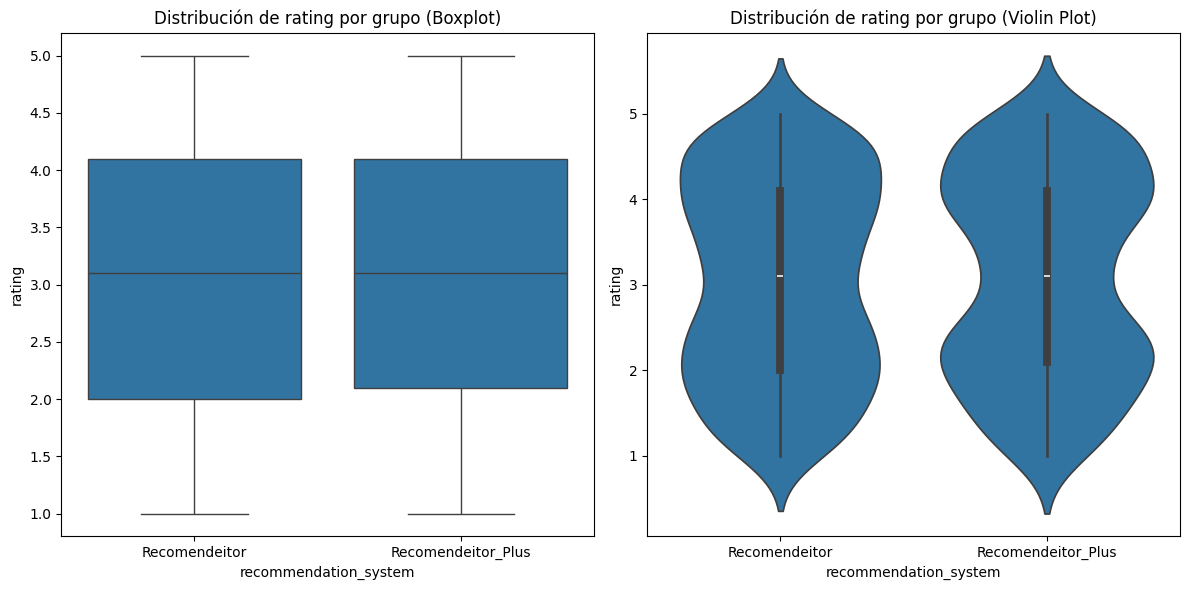

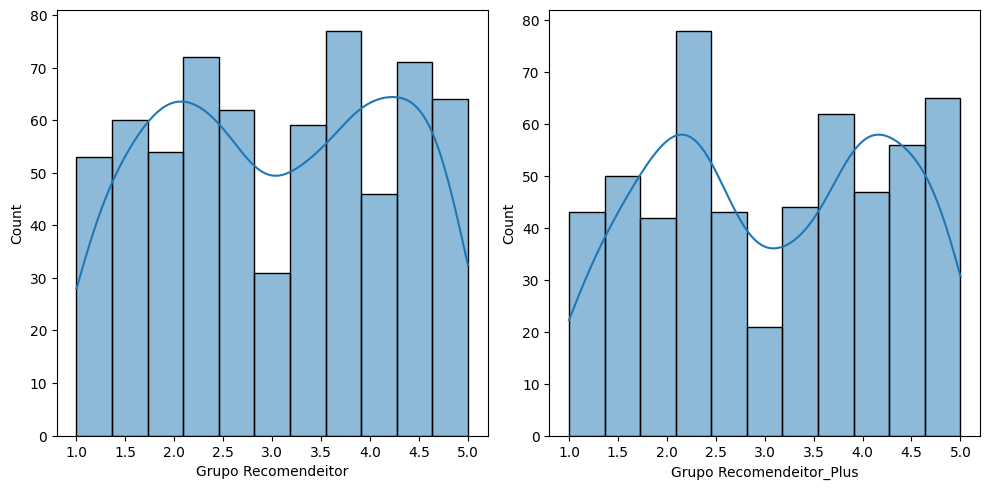

2
Son distribuciones no normales
Son distribuciones homocedasticas
Variable: duration
Test aplicado: test Mann-Whitney U
Estadístico de prueba: 182883.00 | P-valor: 0.4949
--> No hay diferencia significativa en 'duration' entre Recomendeitor y Recomendeitor_Plus.

---------------------------------------
Visualizaciones de variables:


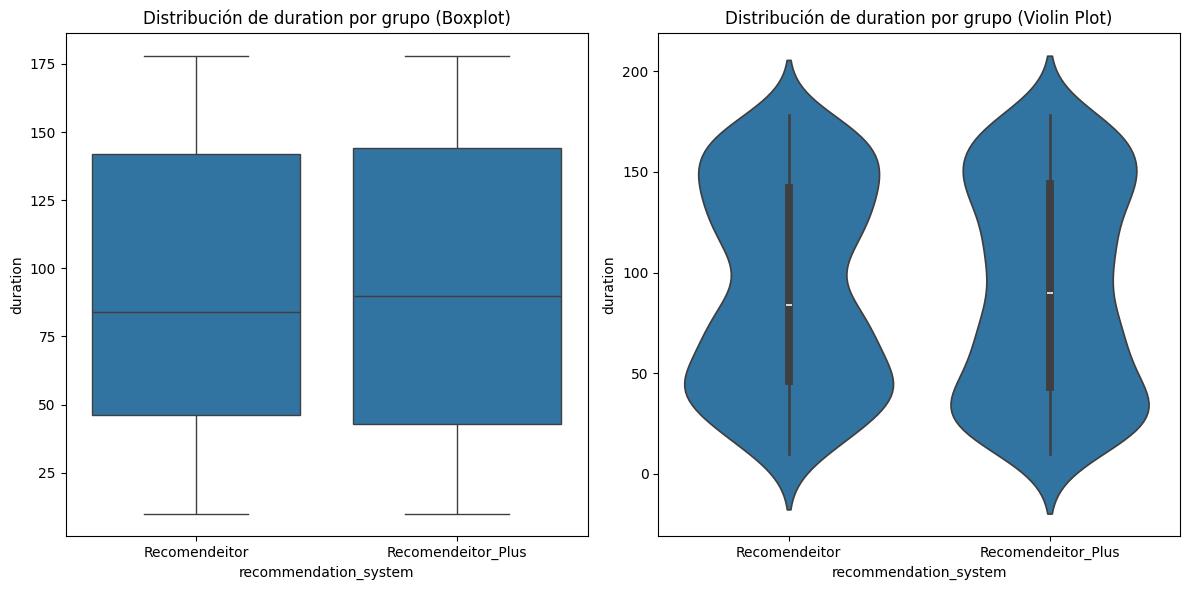

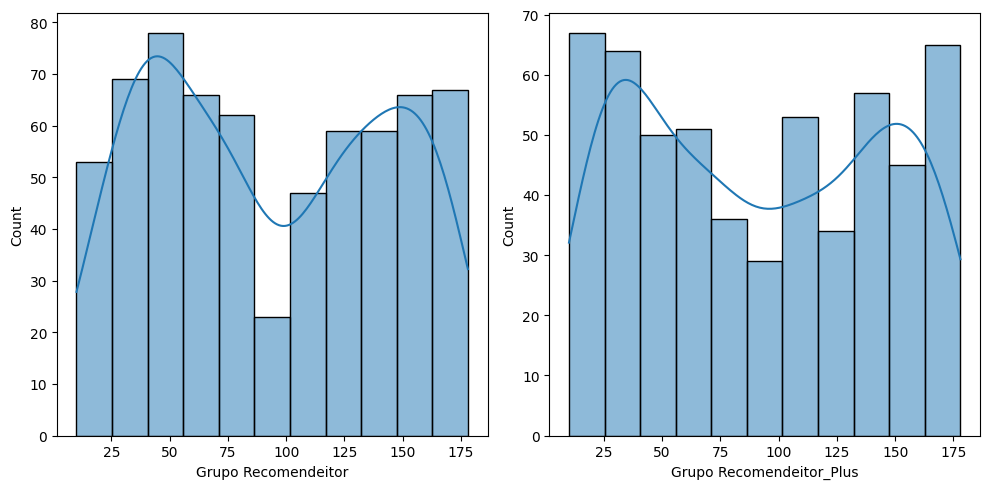

3
Son distribuciones no normales
Son distribuciones homocedasticas
Variable: rating
Test aplicado: test Mann-Whitney U
Estadístico de prueba: 126750.00 | P-valor: 0.5126
--> No hay diferencia significativa en 'rating' entre Recomendeitor y Recomendeitor_Plus.

---------------------------------------
Visualizaciones de variables:


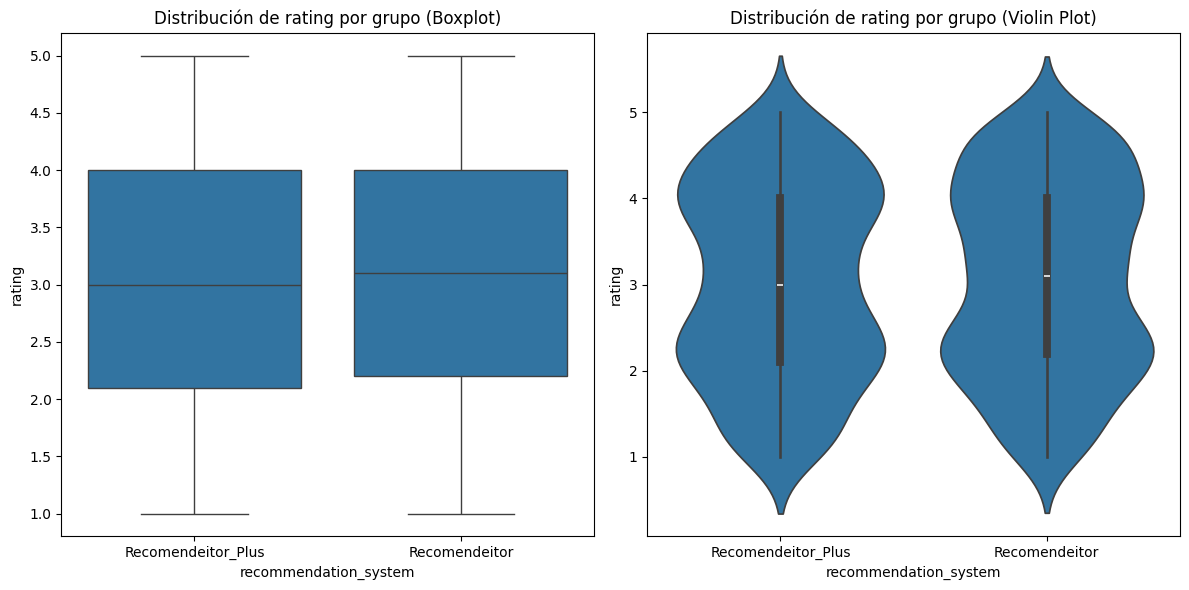

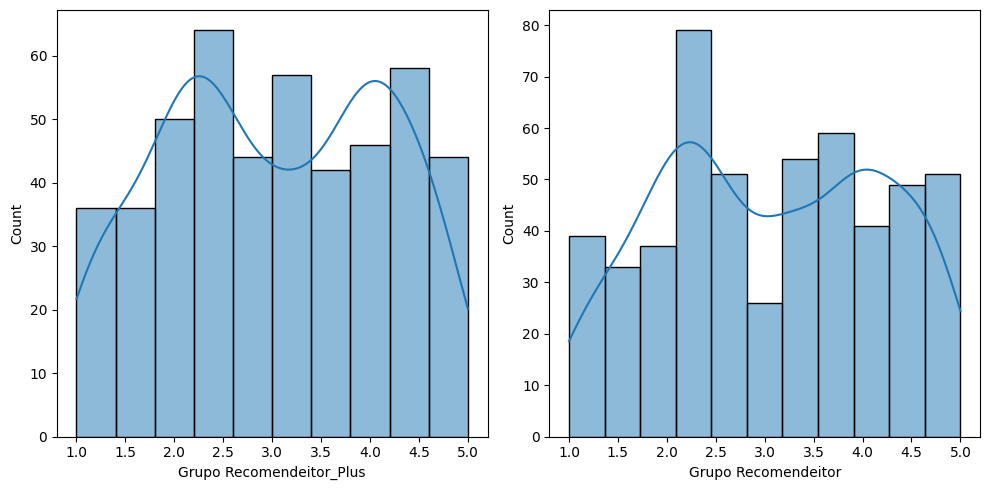

4
Son distribuciones no normales
Son distribuciones homocedasticas
Variable: duration
Test aplicado: test Mann-Whitney U
Estadístico de prueba: 127774.50 | P-valor: 0.3787
--> No hay diferencia significativa en 'duration' entre Recomendeitor y Recomendeitor_Plus.

---------------------------------------
Visualizaciones de variables:


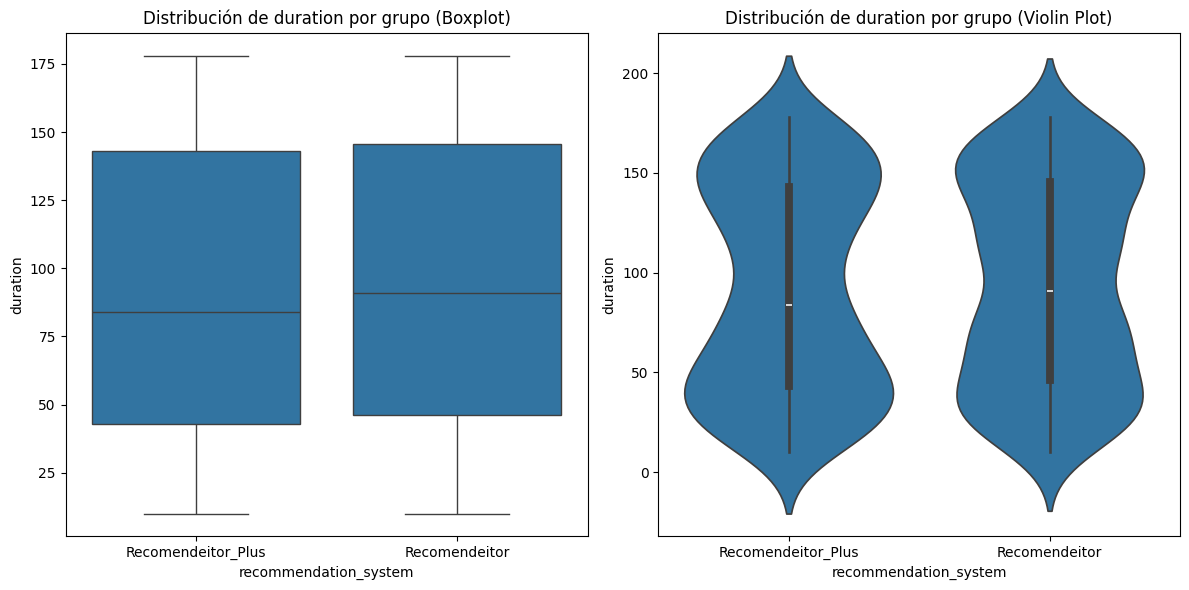

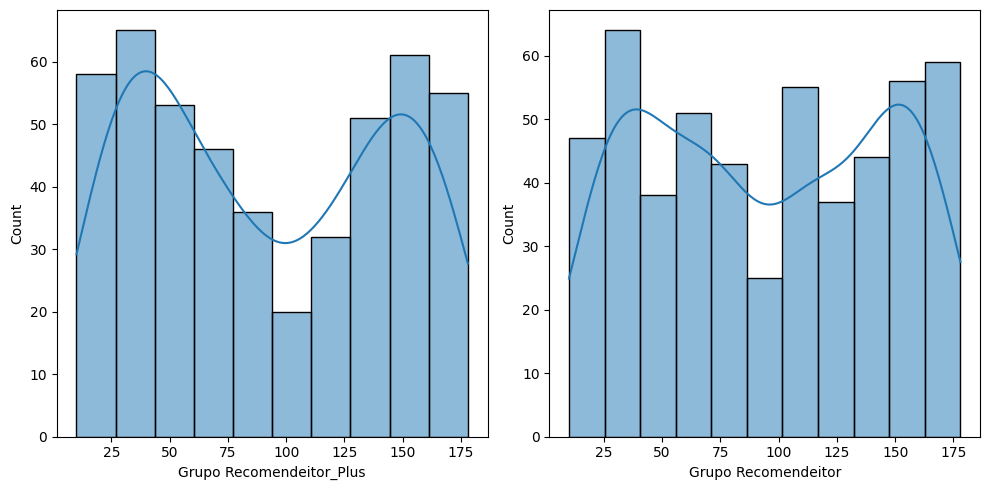

5
Son distribuciones no normales
Son distribuciones homocedasticas
Variable: rating
Test aplicado: test Mann-Whitney U
Estadístico de prueba: 784980.00 | P-valor: 0.8167
--> No hay diferencia significativa en 'rating' entre Recomendeitor y Recomendeitor_Plus.

---------------------------------------
Visualizaciones de variables:


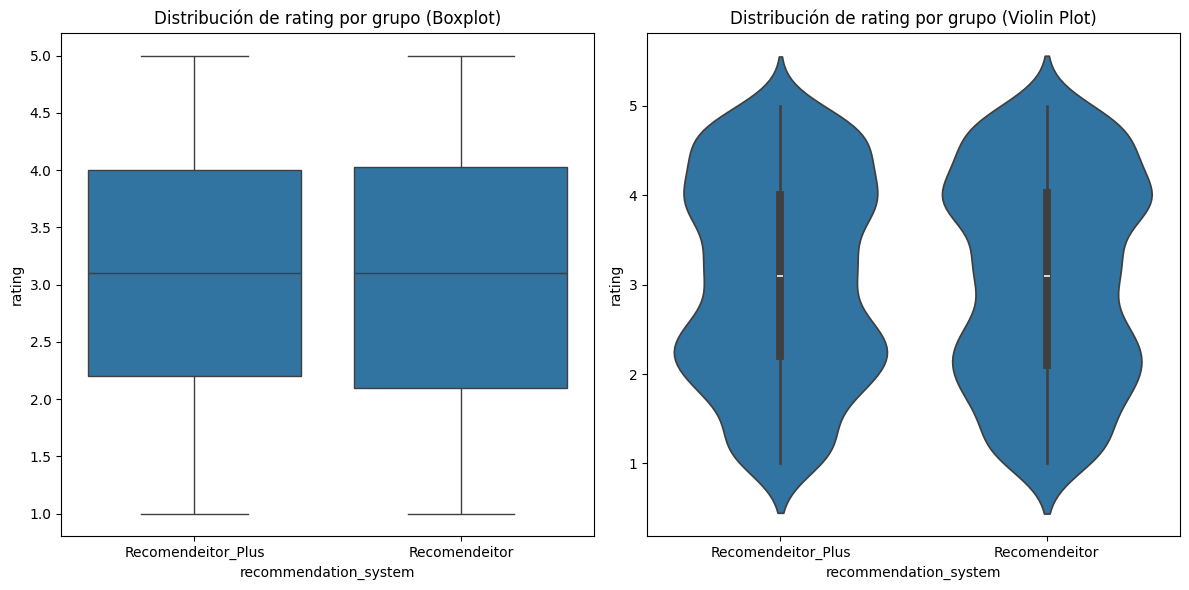

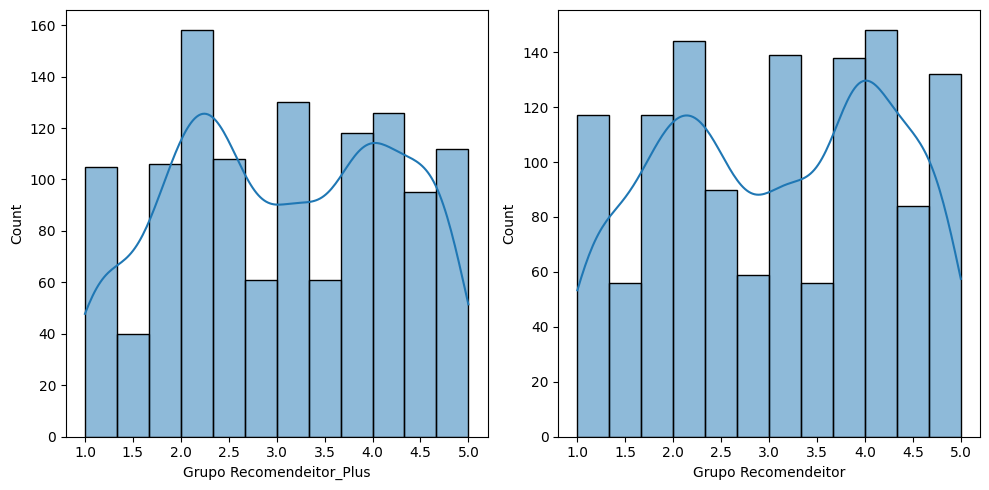

6
Son distribuciones no normales
Son distribuciones homocedasticas
Variable: duration
Test aplicado: test Mann-Whitney U
Estadístico de prueba: 800937.50 | P-valor: 0.2643
--> No hay diferencia significativa en 'duration' entre Recomendeitor y Recomendeitor_Plus.

---------------------------------------
Visualizaciones de variables:


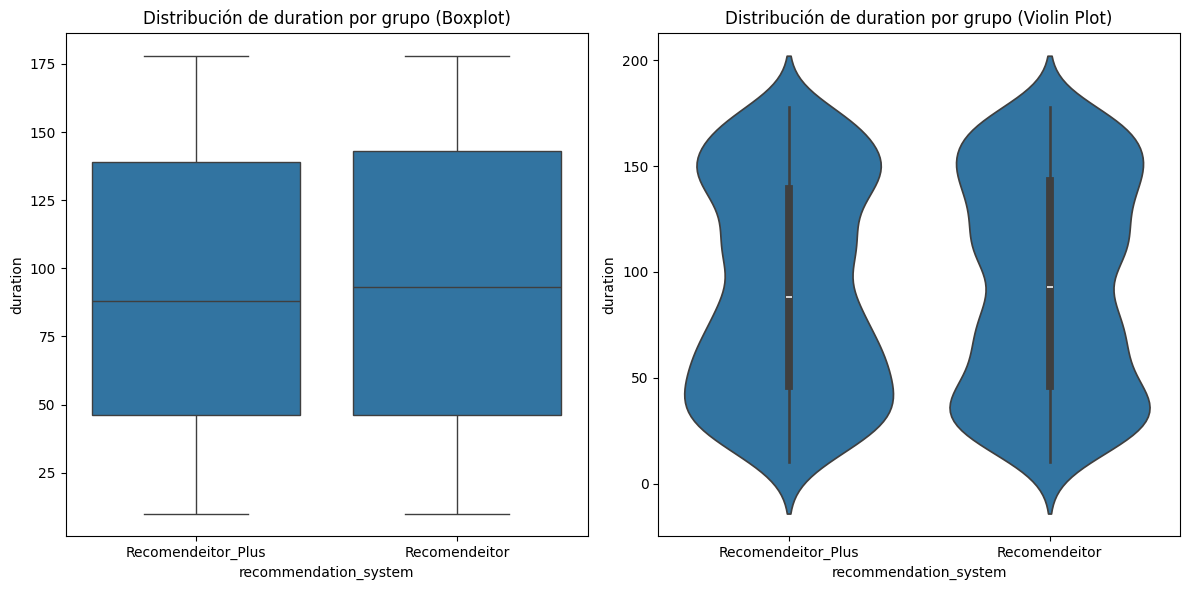

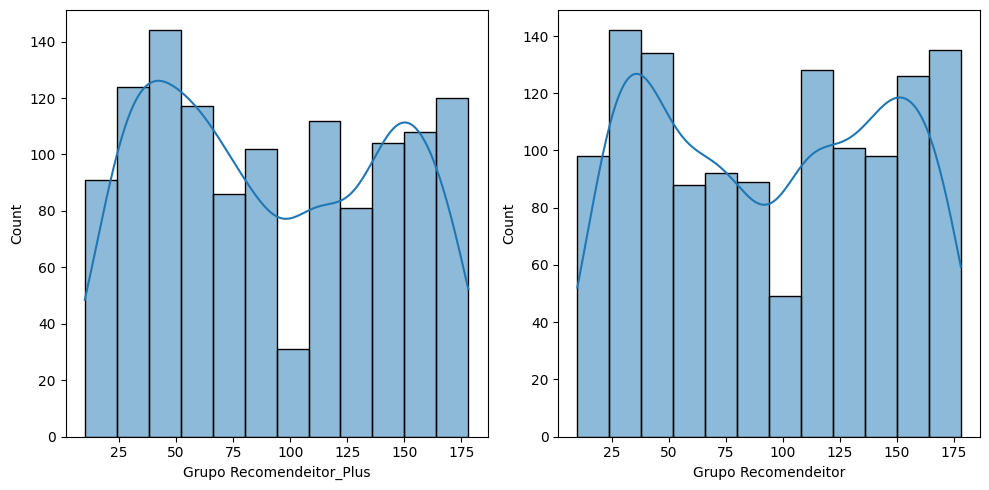

7
Son distribuciones no normales
Son distribuciones homocedasticas
Variable: rating
Test aplicado: test Mann-Whitney U
Estadístico de prueba: 500628.00 | P-valor: 0.8931
--> No hay diferencia significativa en 'rating' entre Recomendeitor y Recomendeitor_Plus.

---------------------------------------
Visualizaciones de variables:


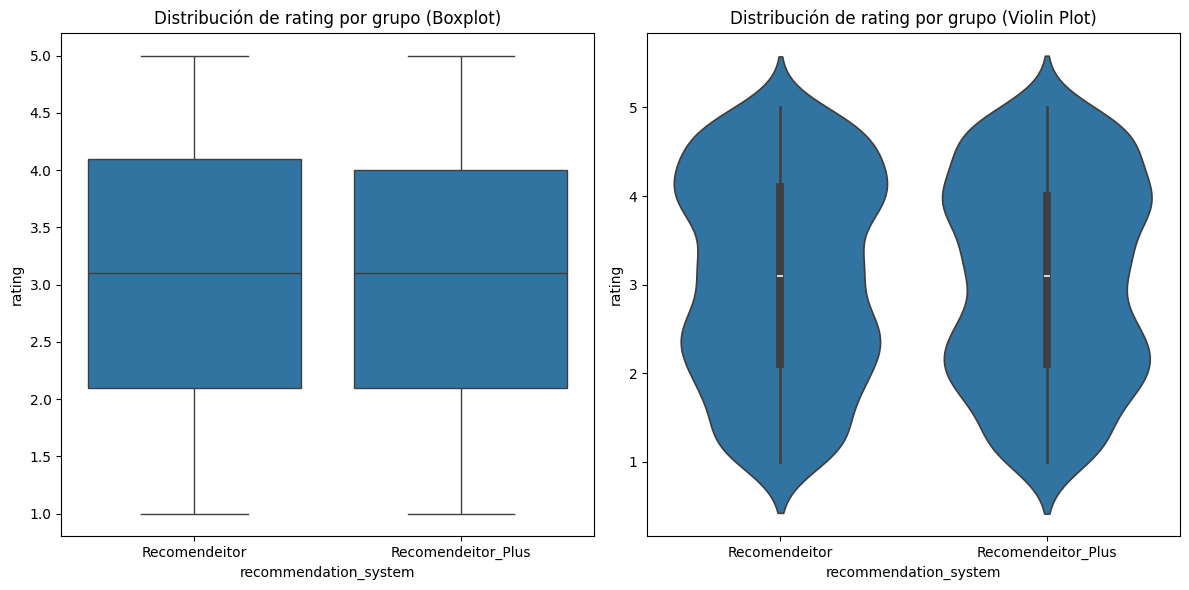

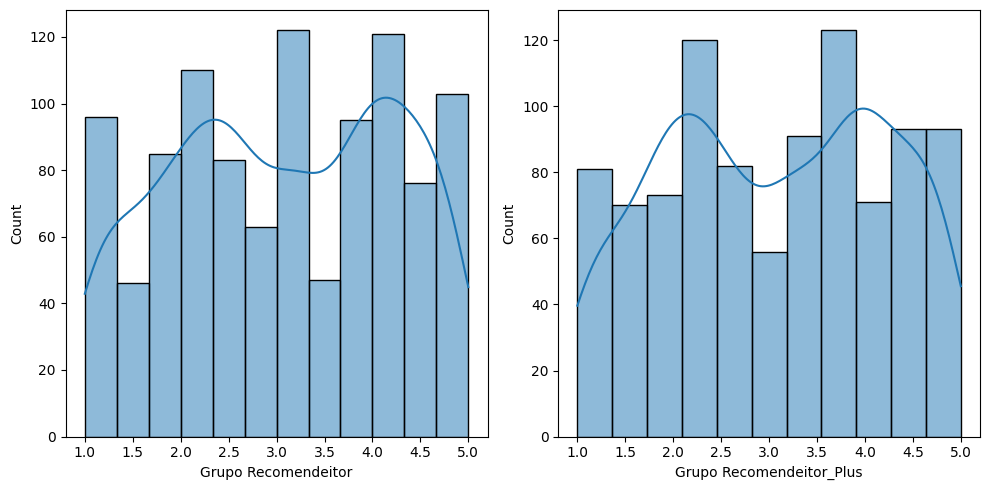

8
Son distribuciones no normales
Son distribuciones homocedasticas
Variable: duration
Test aplicado: test Mann-Whitney U
Estadístico de prueba: 494689.00 | P-valor: 0.7444
--> No hay diferencia significativa en 'duration' entre Recomendeitor y Recomendeitor_Plus.

---------------------------------------
Visualizaciones de variables:


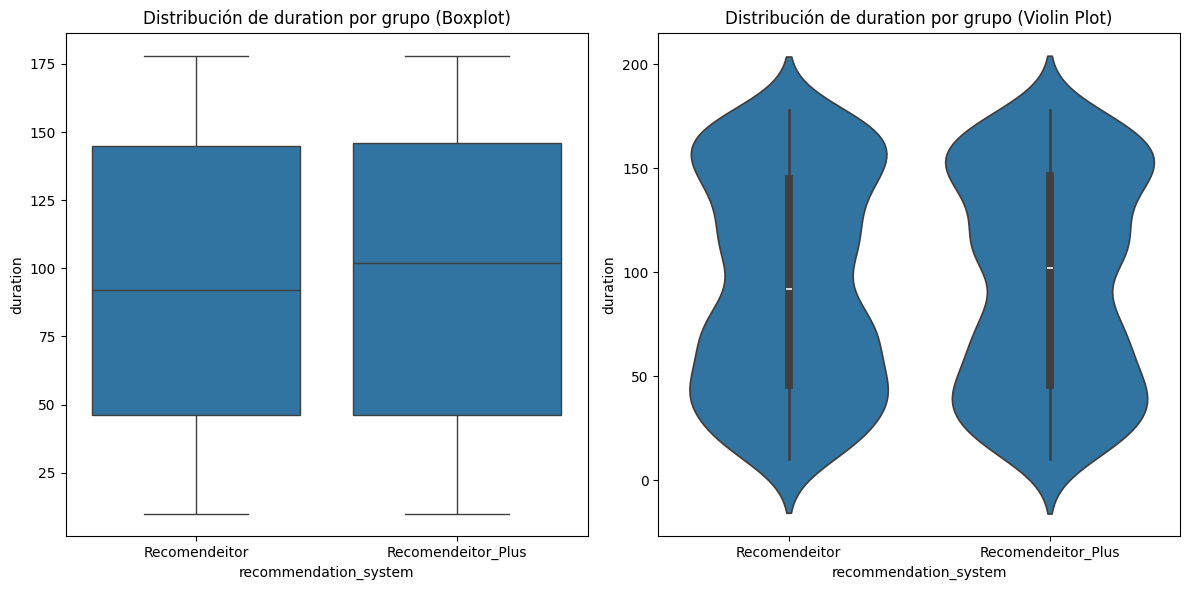

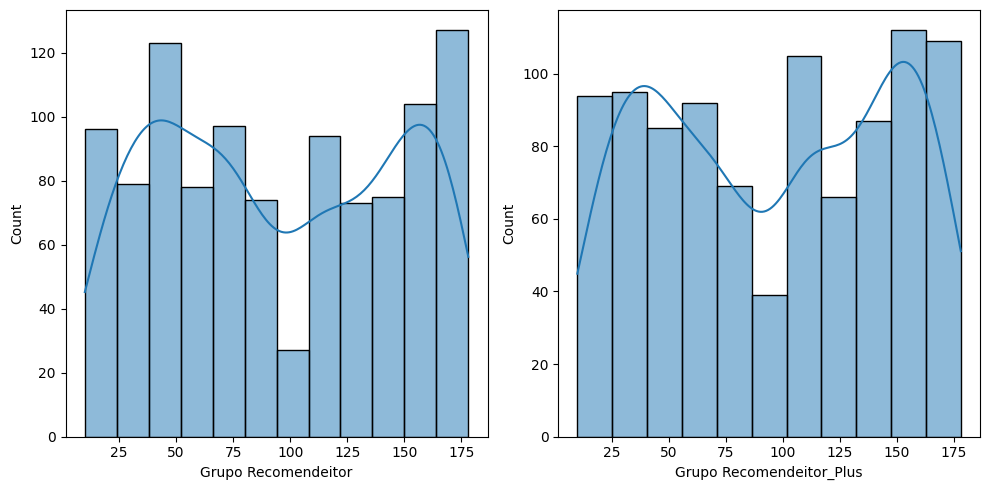

In [9]:
# Lista de variables y dataframes para el A/B testing
variables = [
    (comentarios_df, 'rating'),
    (comentarios_df, 'duration'),
    (favoritos_df, 'rating'),
    (favoritos_df, 'duration'),
    (recomendaciones_df, 'rating'),
    (recomendaciones_df, 'duration'),
    (interacciones_usuario_df, 'rating'),
    (interacciones_usuario_df, 'duration'),
]

# Ejecutar el A/B testing para cada variable
i=1
for df, var in variables:
    print(i)
    realizar_ab_test(df, 'recommendation_system', var, 'Recomendeitor', 'Recomendeitor_Plus')
    i+=1